In [209]:
%matplotlib inline
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
from scipy.spatial import distance
from collections import Counter

def findGenOrImp(dig,flag):
    n = 1
    tempL = []
    for row in train[1:]:
        if n != example[int(dig)]:
            if (row[0] == dig) and (flag == 1):
                tempL.append(L2distance(train[example[int(dig)]][1:],row[1:]))
            elif (int(row[0]) == 1 - int(dig)) and (flag == 0):
                tempL.append(L2distance(train[example[int(dig)]][1:],row[1:]))
    return tempL

def L2distance(a, b):
    temp = [(int(x)-int(y))**2 for x,y in zip(a, b)]
    return math.sqrt(sum(temp))

def find_nearest(dig):
    n = 1
    distance = []
    for row in train[1:]:
        if n != example[int(dig)]:
            distance.append(L2distance(train[example[int(dig)]][1:],row[1:]))
        n += 1
    min_dist = min(distance)
    if distance.index(min_dist) < example[int(dig)]:
        return min_dist, distance.index(min_dist)+1
    else:
        return min_dist, distance.index(min_dist)+2

def showDig(dig):
    n = 1
    for row in train[1:]:
        if row[0] == dig:
            example.append(n)
            plt.subplot(2,5,int(dig)+1)
            testRow = np.array(row[1:], dtype = 'uint8')
            plt.imshow(testRow.reshape(28,28),cmap = 'gray')
            plt.show
            break
        n += 1

def toInt(array):  
    array = np.mat(array)  
    m,n = np.shape(array)  
    newArray = np.zeros((m,n))  
    for i in xrange(m):  
        for j in xrange(n):  
                newArray[i,j]=int(array[i,j])  
    return newArray

In [99]:
#load data & store in train[]            
train = []
example = []
count = [0,0,0,0,0,0,0,0,0,0]
with open('data/train.csv') as f:
    f_csv = csv.reader(f)
    for row in f_csv:
        train.append(row)

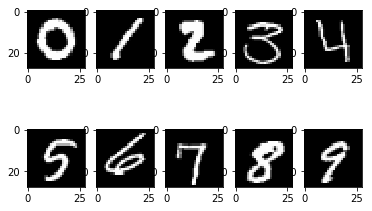

In [4]:
#draw digits and count the number of each digit
plt.figure
digits = ['0','1','2','3','4','5','6','7','8','9']
for dig in digits:
    showDig(dig)
    for row in train[1:]:
        if row[0] == dig: 
            count[int(dig)] = count[int(dig)]+1
plt.savefig('digits.png')

In [10]:
print([x * 1.0/(len(train)-1) for x in count])

[0.09838095238095237, 0.11152380952380953, 0.09945238095238096, 0.1035952380952381, 0.09695238095238096, 0.09035714285714286, 0.0985, 0.10478571428571429, 0.09673809523809523, 0.09971428571428571]


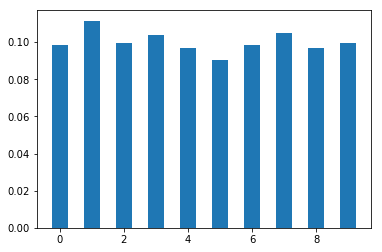

In [7]:
l = [int(x[0]) for x in train[1:]]
plt.hist(l, bins = 10, range = (-0.5,9.5),normed = True,rwidth = 0.5)
plt.figure
plt.show()
plt.savefig('hist.png')

In [8]:
min_dist = []
min_dist_location = []
for dig in digits:
    sign = ''
    t1, t2 = find_nearest(dig)
    if train[t2][0]!= dig:
        sign = '*'
    min_dist.append(str(t1)+sign)
    min_dist_location.append(str(t2)+sign)
print (min_dist, min_dist_location)

(['1046.59543282', '489.679487012', '1380.8772574', '1832.66499939*', '1356.88098225', '1066.36766643', '1446.51132038', '863.501013317', '1593.777588', '910.576740314'], ['12951', '29705', '9537', '8982*', '14788', '30074', '16241', '15276', '32587', '35743'])


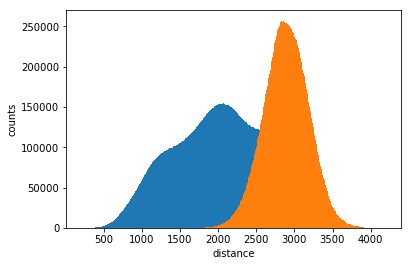

In [210]:
raw_data = pd.read_csv('data/train.csv')
data = np.array(pd.DataFrame(raw_data.iloc[:, 1:]))
labels = np.array(pd.DataFrame(raw_data.iloc[:, :1]))
data_0 = []
data_1 = []
for i in range(len(labels)):
    if labels[i][0] == 0:
        data_0.append(data[i])
    elif labels[i][0] == 1:
        data_1.append(data[i])
    else:
        continue
data_0 = np.array(data_0)
data_1 = np.array(data_1)
distances0_0 = distance.pdist(data_0)
distances0_1 = distance.cdist(data_0, data_1)
distances1_1 = distance.pdist(data_1)
genuine = []
imposter = []
for data in distances0_0:
    genuine.append(data)
for data in distances1_1:
    genuine.append(data)
for i in range(len(distances0_1)):
    for j in range(len(distances0_1[i])):
        imposter.append(distances0_1[i][j])
plt.hist(genuine, bins = 300)
plt.hist(imposter, bins = 300)
plt.xlabel("distance")
plt.ylabel("counts")
plt.show()

generating bound
bound generated
generating counter
counter generated
calculating tpr and fpr
finished


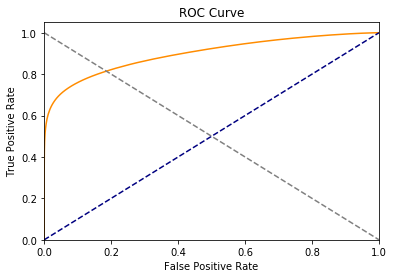

In [236]:
print "generating bound"
lower = int(math.floor(min(min(genuine), min(imposter))))
upper = int(math.ceil(max(max(genuine), max(imposter))))
print "bound generated"
print "generating counter"
genuine_counter = Counter(genuine)
imposter_counter = Counter(imposter)
print "counter generated"
tpr = []
fpr = []
print "calculating tpr and fpr"
for distance in range(upper, lower - 20, -20):
    tp, tn, fp, fn = 0, 0, 0, 0
    for key in genuine_counter:
        if key <= distance:
            tp += genuine_counter.get(key)
        else:
            fn += genuine_counter.get(key)
    for key in imposter_counter:
        if key <= distance:
            fp += imposter_counter.get(key)
        else:
            tn += imposter_counter.get(key)
    tpr.append(tp * 1.0 / (tp + fn))
    fpr.append(fp * 1.0 / (fp + tn))
print "finished"
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot([0, 1], [1, 0], color='grey', linestyle='--')
plt.show()

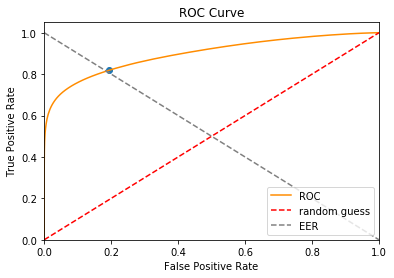

EER is the threshold where fpr = 0.19 and tpr = 0.82


In [255]:
x = np.array(fpr)
y = np.array(tpr)
g = 1 - x
idx = np.argwhere(np.diff(np.sign(y - g)) != 0).reshape(-1) + 0
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr, tpr, color='darkorange', label='ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='random guess')
plt.plot([0, 1], [1, 0], color='grey', linestyle='--', label='EER')
plt.scatter(fpr[idx[0]], tpr[idx[0]])
plt.legend(loc="lower right")
plt.show()
print "EER is the threshold where fpr = %0.2f and tpr = %0.2f" % (fpr[idx[0]], tpr[idx[0]])